## EDA

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import joblib
import pickle

In [44]:

df = pd.read_csv('disease.csv')


# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0      

In [31]:
# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None


In [32]:

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [33]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())
# Count of each disease
print("\nCount of each disease in the dataset:")
print(df['prognosis'].value_counts())




Summary statistics:
           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4962.000000  4962.000000           4962.000000          4962.000000   
mean      0.138049     0.160016              0.021967             0.045143   
std       0.344986     0.366658              0.146590             0.207639   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4962.000000  4962.000000  4962.000000   4962.000000  4962.000000   
mean      0.021967     0.162233     0.139057      0.045143     0.045143   
std       0.146590     0.368702     0.346041      0

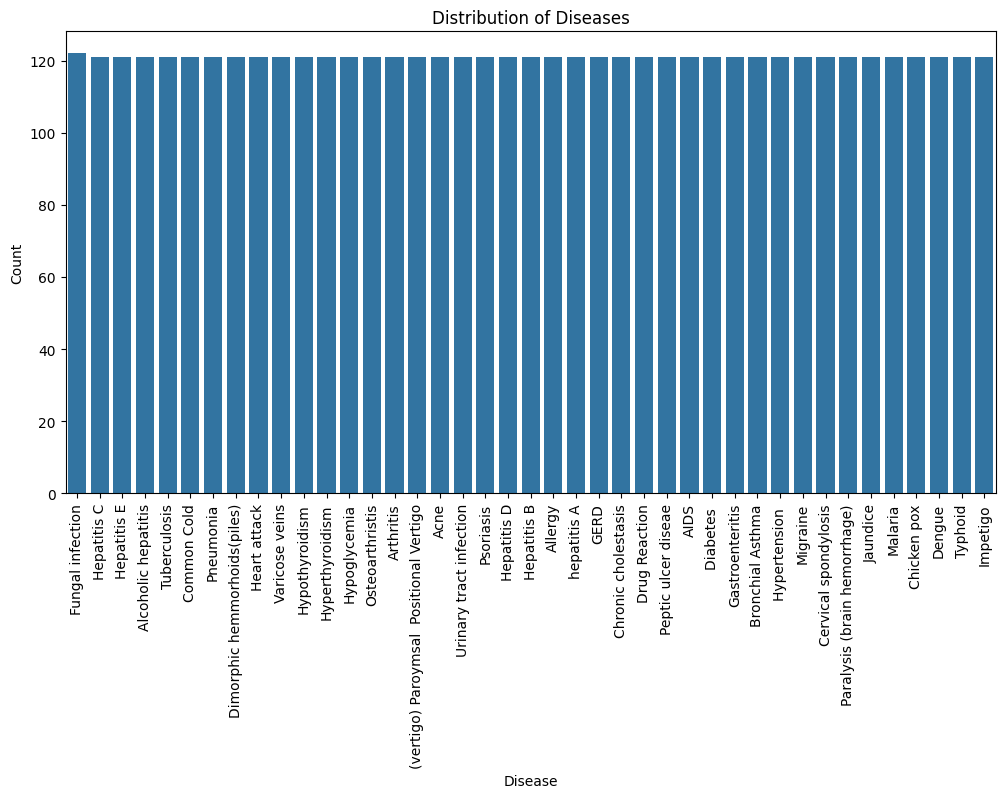

In [34]:
# Visualize the distribution of diseases
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='prognosis', order=df['prognosis'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()



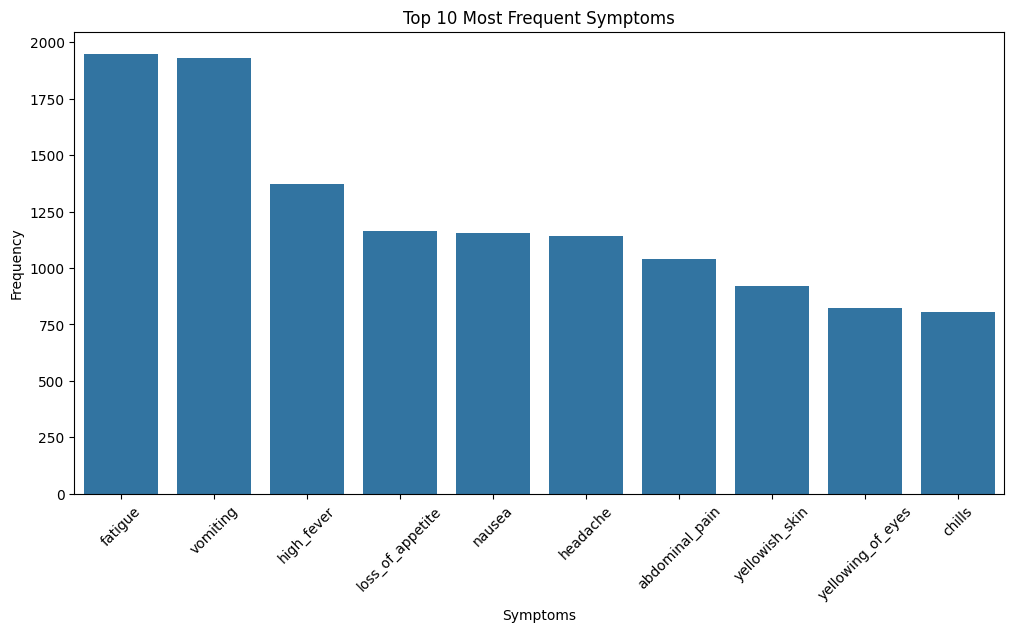

In [35]:
# Distribution of Symptoms (Top 10 Symptoms)
symptom_counts = df.drop(columns=['prognosis']).sum().sort_values(ascending=False)
top_symptoms = symptom_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_symptoms.index, y=top_symptoms.values)
plt.title('Top 10 Most Frequent Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



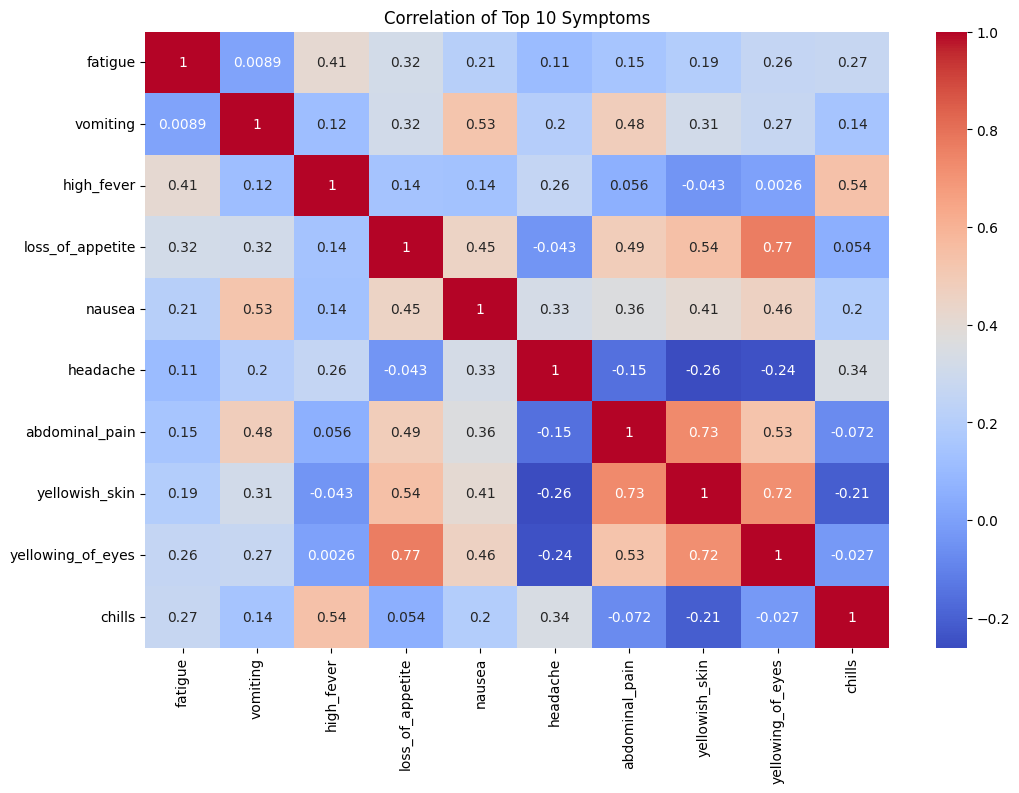

In [37]:
# Heatmap of Top 10 Symptoms Correlation with Each Other
plt.figure(figsize=(12, 8))
top_symptoms_correlation = df[top_symptoms.index].corr()
sns.heatmap(top_symptoms_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Top 10 Symptoms')
plt.show()


## ML Model Training 

In [38]:
# Load the data
data = pd.read_csv('disease.csv')  # Replace 'your_data.csv' with the actual file path

# Check the first few rows to understand the structure
print(data.head())

# Preprocessing
# Check for missing values
print(data.isnull().sum())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [39]:
# Encode categorical target variable if necessary
# Assuming 'prognosis' is a categorical variable, convert it to numeric codes
data['prognosis'], unique_prognosis = pd.factorize(data['prognosis'])



In [40]:
# Create a mapping from numerical codes to original prognosis labels
prognosis_mapping = {index: label for index, label in enumerate(unique_prognosis)}
print("Prognosis Mapping:", prognosis_mapping)  # Print the mapping to ensure it is correct

# Split the data into features and target
X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis']  # Target



Prognosis Mapping: {0: 'Fungal infection', 1: 'Allergy', 2: 'GERD', 3: 'Chronic cholestasis', 4: 'Drug Reaction', 5: 'Peptic ulcer diseae', 6: 'AIDS', 7: 'Diabetes ', 8: 'Gastroenteritis', 9: 'Bronchial Asthma', 10: 'Hypertension ', 11: 'Migraine', 12: 'Cervical spondylosis', 13: 'Paralysis (brain hemorrhage)', 14: 'Jaundice', 15: 'Malaria', 16: 'Chicken pox', 17: 'Dengue', 18: 'Typhoid', 19: 'hepatitis A', 20: 'Hepatitis B', 21: 'Hepatitis C', 22: 'Hepatitis D', 23: 'Hepatitis E', 24: 'Alcoholic hepatitis', 25: 'Tuberculosis', 26: 'Common Cold', 27: 'Pneumonia', 28: 'Dimorphic hemmorhoids(piles)', 29: 'Heart attack', 30: 'Varicose veins', 31: 'Hypothyroidism', 32: 'Hyperthyroidism', 33: 'Hypoglycemia', 34: 'Osteoarthristis', 35: 'Arthritis', 36: '(vertigo) Paroymsal  Positional Vertigo', 37: 'Acne', 38: 'Urinary tract infection', 39: 'Psoriasis', 40: 'Impetigo'}


In [55]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [58]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the trained model
    with open(f"{model_name}.pkl", "wb") as file:
        pickle.dump(model, file)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "Confusion Matrix": cm,
        "Accuracy": acc,
        "F1 Score": f1,
        "Classification Report": report
    }

# Display results
for model_name, metrics in results.items():
    print(f"\nResults for {model_name}:\n")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Classification Report:\n{metrics['Classification Report']}\n")

Training RandomForest...
Training LogisticRegression...
Training DecisionTree...
Training SVM...

Results for RandomForest:

Confusion Matrix:
[[23  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 28]]

Accuracy: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        2

In [10]:
# Decode the predicted value using the mapping
predicted_prognosis = prediction[0]
decoded_prognosis = prognosis_mapping.get(predicted_prognosis, "Unknown Prognosis")  # Use .get() to safely retrieve the label

# Display the random sample and the decoded prediction
print("Random Sample:\n", random_sample)
print("Predicted Prognosis (encoded):", predicted_prognosis)
print("Predicted Prognosis (decoded):", decoded_prognosis)


Random Sample:
      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
239        0          0                     0                    0          0   

     chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
239       0           1             0        0                 0  ...   

     pus_filled_pimples  blackheads  scurring  skin_peeling  \
239                   0           0         0             0   

     silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
239                    0                     0                   0        0   

     red_sore_around_nose  yellow_crust_ooze  
239                     0                  0  

[1 rows x 132 columns]
Predicted Prognosis (encoded): 23
Predicted Prognosis (decoded): Hepatitis E
